In [ ]:
import pandas as pd
import os

merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'

# merged_chest_acc.csv is ~55M rows; use sampling to avoid memory issues
large_file = 'merged_chest_acc.csv'
large_nrows = 100_000  # sample size for head/tail/describe

csv_files = [
    'merged_chest_acc.csv',
    'merged_chest_ecg.csv',
    'merged_chest_eda.csv',
    'merged_chest_emg.csv',
    'merged_chest_resp.csv',
    'merged_chest_temp.csv',
    'merged_event_timings.csv',
    'merged_questionnaire_responses.csv',
    'merged_wrist_acc.csv',
    'merged_wrist_eda.csv',
    'merged_wrist_eda.csv',
    'merged_wrist_temp.csv',
]

for fname in csv_files:
    path = os.path.join(merged_dir, fname)
    if not os.path.exists(path):
        print(f"File not found: {fname}")
        continue

    nrows = large_nrows if fname == large_file else None
    df = pd.read_csv(path, nrows=nrows)

    print("=" * 80)
    print(f"FILE: {fname}")
    print("=" * 80)
    print("\n.head():\n", df.head())
    print("\n.tail():\n", df.tail())
    print("\n.describe():\n", df.describe(include='all'))
    print("\n")

In [ ]:
import pandas as pd
import os

merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'

# Large files (~55M rows); sample to avoid memory issues
large_files = {'merged_chest_acc.csv', 'merged_wrist_acc.csv'}
large_nrows = 100_000

csv_files = [
    'merged_chest_acc.csv',
    'merged_chest_ecg.csv',
    'merged_chest_eda.csv',
    'merged_chest_emg.csv',
    'merged_chest_resp.csv',
    'merged_chest_temp.csv',
    'merged_event_timings.csv',
    'merged_questionnaire_responses.csv',
    'merged_wrist_acc.csv',
    'merged_wrist_bvp.csv',
    'merged_wrist_eda.csv',
    'merged_wrist_temp.csv',
]

for fname in csv_files:
    path = os.path.join(merged_dir, fname)
    if not os.path.exists(path):
        print(f"File not found: {fname}")
        continue

    nrows = large_nrows if fname in large_files else None
    df = pd.read_csv(path, nrows=nrows)

    print("=" * 80)
    print(f"FILE: {fname}")
    print("=" * 80)
    print("\n.head():\n", df.head())
    print("\n.tail():\n", df.tail())
    print("\n.describe():\n", df.describe(include='all'))
    print("\n")

In [ ]:
! pip install ucimlrepo

Python(11139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
print('Listing contents of MyDrive:')
! ls "/Users/mostafazamaniturk/Documents/USD/AAI-530/work"

Listing contents of MyDrive:
WESAD.zip                     ai_data_cleaning-cursor.ipynb
WESAD_data


Python(11140) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


If your `WESAD.zip` file is inside a subfolder, for example, named `MyProject`, you would then run:

```python
!ls "/Users/mostafazamaniturk/Documents/USD/AAI-530/work"
```

Once you find the file, use the full path in your code.

In [12]:
import os
import zipfile

# Define paths using your local structure
base_path = r'/Users/mostafazamaniturk/Documents/USD/AAI-530/work'
zip_path = os.path.join(base_path, 'WESAD.zip')
extract_path = os.path.join(base_path, 'WESAD_data')

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extraction complete! Files are in: {extract_path}")
else:
    print("Zip file not found. Check the path again.")

Extraction complete! Files are in: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data


# Task
Explore the structure of the unzipped WESAD data by listing the contents of the `/content/WESAD_data` directory to identify the main data files.

## Explore Unzipped Data

### Subtask:
Explore the structure of the unzipped WESAD data by listing the contents of the `/content/WESAD_data` directory to identify the main data files.


**Reasoning**:
To explore the structure of the unzipped WESAD data, I will list the contents of the `/content/WESAD_data` directory using the `!ls -F` command as instructed.



In [20]:
print('Listing contents of the unzipped WESAD data directory:')
!ls -F /Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data

Listing contents of the unzipped WESAD data directory:
WESAD/               merged_cleaned_data/


Python(11144) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


**Reasoning**:
Since the previous `ls` command revealed a subdirectory named `WESAD/`, I will now list the contents of this subdirectory to further explore the data structure and locate the actual data files.



In [24]:
print('Listing contents of the WESAD subdirectory:')
!ls -F /Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/WESAD

Listing contents of the WESAD subdirectory:
S10/              S15/              S3/               S7/
S11/              S16/              S4/               S8/
S13/              S17/              S5/               S9/
S14/              S2/               S6/               wesad_readme.pdf


Python(11153) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


**Reasoning**:
The previous command revealed subject-specific subdirectories (S2/, S3/, etc.) and a `wesad_readme.pdf` file. To understand the data structure further, I will list the contents of one of these subject directories, specifically `S2/`, to see what kind of data files are stored there.



In [25]:
print('Listing contents of the S2 subdirectory:')
!ls -F /Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/WESAD/S2

Listing contents of the S2 subdirectory:
S2.pkl           S2_quest.csv     S2_respiban.txt
S2_E4_Data.zip   S2_readme.txt    cleaned_data/


Python(11154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## Load Data

### Subtask:
Load the relevant WESAD data files into pandas DataFrames for cleaning.


In [26]:
import pandas as pd
import numpy as np

# Define the base path to the S2 subject data directory
s2_data_path = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/WESAD/S2'

# Load the S2.pkl file into a dictionary first
s2_raw_data_dict = pd.read_pickle(f'{s2_data_path}/S2.pkl')

# Initialize dictionaries to hold individual sensor DataFrames
chest_dataframes = {}
wrist_dataframes = {}

# Process 'chest' signals
chest_signals = s2_raw_data_dict['signal']['chest']
for sensor_name, data_array in chest_signals.items():
    if sensor_name == 'ACC':
        # Accelerometer data is 3-axis, create three columns
        chest_dataframes[sensor_name] = pd.DataFrame(data_array, columns=['ACC_x', 'ACC_y', 'ACC_z'])
    else:
        # Other sensors are typically 1D or 2D with one column, flatten and create a DataFrame
        chest_dataframes[sensor_name] = pd.DataFrame(data_array.flatten(), columns=[sensor_name])

# Process 'wrist' signals
wrist_signals = s2_raw_data_dict['signal']['wrist']
for sensor_name, data_array in wrist_signals.items():
    if sensor_name == 'ACC':
        # Accelerometer data is 3-axis, create three columns
        wrist_dataframes[sensor_name] = pd.DataFrame(data_array, columns=['ACC_x', 'ACC_y', 'ACC_z'])
    else:
        # Other sensors are typically 1D or 2D with one column, flatten and create a DataFrame
        wrist_dataframes[sensor_name] = pd.DataFrame(data_array.flatten(), columns=[sensor_name])

# Load the S2_quest.csv file into a pandas DataFrame
df_s2_quest = pd.read_csv(f'{s2_data_path}/S2_quest.csv')

print("Chest DataFrames (first 5 rows of each):")
for sensor_name, df in chest_dataframes.items():
    print(f"\n{sensor_name}:")
    print(df.head())

print("\nWrist DataFrames (first 5 rows of each):")
for sensor_name, df in wrist_dataframes.items():
    print(f"\n{sensor_name}:")
    print(df.head())

print("\ndf_s2_quest head:")
print(df_s2_quest.head())

Chest DataFrames (first 5 rows of each):

ACC:
    ACC_x   ACC_y   ACC_z
0  0.9554 -0.2220 -0.5580
1  0.9258 -0.2216 -0.5538
2  0.9082 -0.2196 -0.5392
3  0.8974 -0.2102 -0.5122
4  0.8882 -0.2036 -0.4824

ECG:
        ECG
0  0.021423
1  0.020325
2  0.016525
3  0.016708
4  0.011673

EMG:
        EMG
0 -0.004440
1  0.004349
2  0.005173
3  0.007187
4 -0.015152

EDA:
        EDA
0  5.250549
1  5.267334
2  5.243301
3  5.249405
4  5.286407

Temp:
        Temp
0  30.120758
1  30.129517
2  30.138214
3  30.129517
4  30.130951

Resp:
       Resp
0 -1.148987
1 -1.124573
2 -1.152039
3 -1.158142
4 -1.161194

Wrist DataFrames (first 5 rows of each):

ACC:
   ACC_x  ACC_y  ACC_z
0   62.0  -21.0  107.0
1   66.0   13.0   53.0
2   41.0    9.0   15.0
3   52.0   16.0   24.0
4   54.0   15.0   34.0

BVP:
     BVP
0 -59.37
1 -53.42
2 -44.40
3 -33.17
4 -20.79

EDA:
        EDA
0  1.138257
1  1.125444
2  1.011405
3  1.033188
4  0.935807

TEMP:
    TEMP
0  35.41
1  35.41
2  35.41
3  35.41
4  35.41

df_s2_quest h

## Initial Data Inspection

### Subtask:
Perform an initial inspection of the loaded data, including checking the first few rows (.head()), data types (.info()), and descriptive statistics (.describe()) to identify potential issues.


**Reasoning**:
To perform an initial inspection, I will iterate through the `chest_dataframes` and `wrist_dataframes` dictionaries, applying `.head()`, `.info()`, and `.describe()` to each sensor DataFrame. I will also apply these methods to the `df_s2_quest` DataFrame.



In [27]:
print("--- Initial Data Inspection for Chest Sensor DataFrames ---")
for sensor_name, df in chest_dataframes.items():
    print(f"\n----- {sensor_name} Data (Chest) -----")
    print(f"\n{sensor_name}.head():")
    print(df.head())
    print(f"\n{sensor_name}.info():")
    df.info()
    print(f"\n{sensor_name}.describe():")
    print(df.describe())

print("\n--- Initial Data Inspection for Wrist Sensor DataFrames ---")
for sensor_name, df in wrist_dataframes.items():
    print(f"\n----- {sensor_name} Data (Wrist) -----")
    print(f"\n{sensor_name}.head():")
    print(df.head())
    print(f"\n{sensor_name}.info():")
    df.info()
    print(f"\n{sensor_name}.describe():")
    print(df.describe())

print("\n--- Initial Data Inspection for Questionnaire Data (df_s2_quest) ---")
print("\ndf_s2_quest.head():")
print(df_s2_quest.head())
print("\ndf_s2_quest.info():")
df_s2_quest.info()
print("\ndf_s2_quest.describe():")
print(df_s2_quest.describe())

--- Initial Data Inspection for Chest Sensor DataFrames ---

----- ACC Data (Chest) -----

ACC.head():
    ACC_x   ACC_y   ACC_z
0  0.9554 -0.2220 -0.5580
1  0.9258 -0.2216 -0.5538
2  0.9082 -0.2196 -0.5392
3  0.8974 -0.2102 -0.5122
4  0.8882 -0.2036 -0.4824

ACC.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255300 entries, 0 to 4255299
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ACC_x   float64
 1   ACC_y   float64
 2   ACC_z   float64
dtypes: float64(3)
memory usage: 97.4 MB

ACC.describe():
              ACC_x         ACC_y         ACC_z
count  4.255300e+06  4.255300e+06  4.255300e+06
mean   7.538656e-01 -1.331884e-01 -4.226812e-01
std    1.751162e-01  6.417297e-02  3.002357e-01
min    2.150000e-01 -6.600000e-01 -1.135400e+00
25%    6.210001e-01 -1.498000e-01 -7.172000e-01
50%    8.568000e-01 -1.256000e-01 -3.222000e-01
75%    8.922000e-01 -9.579998e-02 -2.098000e-01
max    2.029800e+00  5.390000e-01  1.246800e+00

----- ECG Data (Ches

In [12]:
import os
import pandas as pd
import numpy as np

# Define paths - works for both local and Colab
base_path = r'/Users/mostafazamaniturk/Documents/USD/AAI-530/work'
wesad_base = os.path.join(base_path, 'WESAD_data', 'WESAD')

# All subject folders to process
SUBJECTS = ['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']

def clean_split_list(s):
    parts = s.replace('#', '').split(';')
    return [p.strip() for p in parts if p.strip()]

def process_subject(subject):
    """Load, clean, parse, and save data for one subject."""
    subject_path = os.path.join(wesad_base, subject)
    pkl_path = os.path.join(subject_path, f'{subject}.pkl')
    quest_path = os.path.join(subject_path, f'{subject}_quest.csv')
    
    if not os.path.exists(pkl_path) or not os.path.exists(quest_path):
        print(f"Skipping {subject}: missing pkl or quest file")
        return None
    
    # Load pkl
    raw_data = pd.read_pickle(pkl_path)
    chest_dataframes = {}
    wrist_dataframes = {}
    
    # Process chest signals
    for sensor_name, data_array in raw_data['signal']['chest'].items():
        if sensor_name == 'ACC':
            chest_dataframes[sensor_name] = pd.DataFrame(data_array, columns=['ACC_x', 'ACC_y', 'ACC_z'])
        else:
            chest_dataframes[sensor_name] = pd.DataFrame(data_array.flatten(), columns=[sensor_name])
    
    # Process wrist signals
    for sensor_name, data_array in raw_data['signal']['wrist'].items():
        if sensor_name == 'ACC':
            wrist_dataframes[sensor_name] = pd.DataFrame(data_array, columns=['ACC_x', 'ACC_y', 'ACC_z'])
        else:
            wrist_dataframes[sensor_name] = pd.DataFrame(data_array.flatten(), columns=[sensor_name])
    
    # Remove duplicates
    for sensor_name in chest_dataframes:
        chest_dataframes[sensor_name] = chest_dataframes[sensor_name].drop_duplicates().reset_index(drop=True)
    for sensor_name in wrist_dataframes:
        wrist_dataframes[sensor_name] = wrist_dataframes[sensor_name].drop_duplicates().reset_index(drop=True)
    
    # Load and parse questionnaire
    df_quest = pd.read_csv(quest_path)
    order_str = df_quest.iloc[0, 0]
    start_str = df_quest.iloc[1, 0]
    end_str = df_quest.iloc[2, 0]
    
    event_names = clean_split_list(order_str)[1:]
    start_times = {event: float(clean_split_list(start_str)[i+1]) if (i+1) < len(clean_split_list(start_str)) else None 
                   for i, event in enumerate(event_names)}
    end_times = {event: float(clean_split_list(end_str)[i+1]) if (i+1) < len(clean_split_list(end_str)) else None 
                 for i, event in enumerate(event_names)}
    
    df_event_timings = pd.DataFrame({
        'Event': event_names,
        'Start_Time': [start_times.get(e) for e in event_names],
        'End_Time': [end_times.get(e) for e in event_names]
    })
    
    # Parse questionnaire responses
    panas_data, stai_data, dim_data, sssq_data = [], [], [], []
    for i in range(4, len(df_quest)):
        row_string = df_quest.iloc[i, 0]
        if row_string.startswith('# PANAS'):
            parts = row_string.replace('# PANAS;', '').split(';')
            panas_data.append([float(p.strip()) for p in parts if p.strip()])
        elif row_string.startswith('# STAI'):
            parts = row_string.replace('# STAI;', '').split(';')
            stai_data.append([float(p.strip()) for p in parts if p.strip()])
        elif row_string.startswith('# DIM'):
            parts = row_string.replace('# DIM;', '').split(';')
            dim_data.append([float(p.strip()) for p in parts if p.strip()])
        elif row_string.startswith('# SSSQ'):
            parts = row_string.replace('# SSSQ;', '').split(';')
            sssq_data.append([float(p.strip()) for p in parts if p.strip()])
    
    df_panas = pd.DataFrame(panas_data)
    df_stai = pd.DataFrame(stai_data)
    df_dim = pd.DataFrame(dim_data)
    df_sssq = pd.DataFrame(sssq_data)
    
    df_panas.columns = [f'PANAS_{i}' for i in range(len(df_panas.columns))]
    df_stai.columns = [f'STAI_{i}' for i in range(len(df_stai.columns))]
    df_dim.columns = [f'DIM_{i}' for i in range(len(df_dim.columns))]
    df_sssq.columns = [f'SSSQ_{i}' for i in range(len(df_sssq.columns))]
    
    df_combined = pd.concat([df_panas, df_stai, df_dim], axis=1)
    df_sssq_ext = pd.DataFrame(np.nan, index=range(len(df_combined)), columns=df_sssq.columns)
    if not df_sssq.empty:
        df_sssq_ext.iloc[0] = df_sssq.iloc[0]
    df_questionnaire_responses = pd.concat([df_combined, df_sssq_ext], axis=1)
    
    # Save to subject's cleaned_data folder
    cleaned_data_dir = os.path.join(subject_path, 'cleaned_data')
    os.makedirs(cleaned_data_dir, exist_ok=True)
    
    df_event_timings.to_csv(os.path.join(cleaned_data_dir, 'df_event_timings.csv'), index=False)
    df_questionnaire_responses.to_csv(os.path.join(cleaned_data_dir, 'df_questionnaire_responses.csv'), index=False)
    for sensor_name, df in chest_dataframes.items():
        df.to_csv(os.path.join(cleaned_data_dir, f'chest_{sensor_name.lower()}.csv'), index=False)
    for sensor_name, df in wrist_dataframes.items():
        df.to_csv(os.path.join(cleaned_data_dir, f'wrist_{sensor_name.lower()}.csv'), index=False)
    
    return {
        'subject': subject,
        'df_event_timings': df_event_timings,
        'df_questionnaire_responses': df_questionnaire_responses,
        'chest_dataframes': chest_dataframes,
        'wrist_dataframes': wrist_dataframes,
    }

# Process all subjects
all_results = []
for subject in SUBJECTS:
    print(f"Processing {subject}...")
    result = process_subject(subject)
    if result is not None:
        all_results.append(result)
        print(f"  Saved cleaned data for {subject}")

# Merge event timings and questionnaire responses
merged_event_timings = []
merged_questionnaire = []
for r in all_results:
    et = r['df_event_timings'].copy()
    et['subject'] = r['subject']
    merged_event_timings.append(et)
    qr = r['df_questionnaire_responses'].copy()
    qr['subject'] = r['subject']
    merged_questionnaire.append(qr)

df_merged_event_timings = pd.concat(merged_event_timings, ignore_index=True)
df_merged_questionnaire = pd.concat(merged_questionnaire, ignore_index=True)

# Merge sensor data (with subject column)
# Map file names to actual dict keys (chest: Temp/Resp, wrist: TEMP)
sensor_map = {
    'chest_acc': ('chest', 'ACC'), 'chest_ecg': ('chest', 'ECG'), 'chest_emg': ('chest', 'EMG'),
    'chest_eda': ('chest', 'EDA'), 'chest_temp': ('chest', 'Temp'), 'chest_resp': ('chest', 'Resp'),
    'wrist_acc': ('wrist', 'ACC'), 'wrist_bvp': ('wrist', 'BVP'), 'wrist_eda': ('wrist', 'EDA'),
    'wrist_temp': ('wrist', 'TEMP')
}
merged_sensors = {}
for fname, (sensor_type, sensor_key) in sensor_map.items():
    parts = []
    for r in all_results:
        dfs = r['chest_dataframes'] if sensor_type == 'chest' else r['wrist_dataframes']
        if sensor_key in dfs:
            df = dfs[sensor_key].copy()
            df['subject'] = r['subject']
            parts.append(df)
    if parts:
        merged_sensors[fname] = pd.concat(parts, ignore_index=True)

# Save merged dataset
merged_dir = os.path.join(base_path, 'WESAD_data', 'merged_cleaned_data')
os.makedirs(merged_dir, exist_ok=True)
print(f"\nSaving merged dataset to: {merged_dir}")

df_merged_event_timings.to_csv(os.path.join(merged_dir, 'merged_event_timings.csv'), index=False)
df_merged_questionnaire.to_csv(os.path.join(merged_dir, 'merged_questionnaire_responses.csv'), index=False)
for fname, df in merged_sensors.items():
    df.to_csv(os.path.join(merged_dir, f'merged_{fname}.csv'), index=False)

print(f"Saved merged_event_timings.csv ({len(df_merged_event_timings)} rows)")
print(f"Saved merged_questionnaire_responses.csv ({len(df_merged_questionnaire)} rows)")
for fname, df in merged_sensors.items():
    print(f"Saved merged_{fname}.csv ({len(df)} rows)")
print("\nAll cleaned data saved per subject and merged dataset saved successfully!")

Processing S2...
  Saved cleaned data for S2
Processing S3...
  Saved cleaned data for S3
Processing S4...
  Saved cleaned data for S4
Processing S5...
  Saved cleaned data for S5
Processing S6...
  Saved cleaned data for S6
Processing S7...
  Saved cleaned data for S7
Processing S8...
  Saved cleaned data for S8
Processing S9...
  Saved cleaned data for S9
Processing S10...
  Saved cleaned data for S10
Processing S11...
  Saved cleaned data for S11
Processing S13...
  Saved cleaned data for S13
Processing S14...
  Saved cleaned data for S14
Processing S15...
  Saved cleaned data for S15
Processing S16...
  Saved cleaned data for S16
Processing S17...
  Saved cleaned data for S17

Saving merged dataset to: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data
Saved merged_event_timings.csv (119 rows)
Saved merged_questionnaire_responses.csv (75 rows)
Saved merged_chest_acc.csv (55792554 rows)
Saved merged_chest_ecg.csv (643020 rows)
Saved merged_chest_emg.c

Now, We are going to release information from merged datasets

In [28]:
import os
import pandas as pd
import numpy as np

merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'

# 1. File inventory and sizes
print("=" * 60)
print("MERGED CSV FILES - INVENTORY")
print("=" * 60)
csv_files = sorted([f for f in os.listdir(merged_dir) if f.endswith('.csv')])
for f in csv_files:
    path = os.path.join(merged_dir, f)
    size_mb = os.path.getsize(path) / (1024 * 1024)
    print(f"  {f}: {size_mb:.2f} MB")

# 2. Load and extract info from event timings
print("\n" + "=" * 60)
print("EVENT TIMINGS")
print("=" * 60)
df_events = pd.read_csv(os.path.join(merged_dir, 'merged_event_timings.csv'))
print(f"Total rows: {len(df_events)}")
print(f"Unique subjects: {df_events['subject'].nunique()}")
print(f"Unique events: {df_events['Event'].unique().tolist()}")
df_events['Duration'] = df_events['End_Time'] - df_events['Start_Time']
print("\nDuration (minutes) per event type:")
print(df_events.groupby('Event')['Duration'].agg(['mean', 'min', 'max']).round(2))
print("\nSample:")
print(df_events.head(10))

# 3. Load and extract info from questionnaire responses
print("\n" + "=" * 60)
print("QUESTIONNAIRE RESPONSES (PANAS, STAI, DIM, SSSQ)")
print("=" * 60)
df_quest = pd.read_csv(os.path.join(merged_dir, 'merged_questionnaire_responses.csv'))
print(f"Total rows: {len(df_quest)}")
print(f"Unique subjects: {df_quest['subject'].nunique()}")
print(f"Columns: {list(df_quest.columns)}")
print("\nResponses per subject:")
print(df_quest.groupby('subject').size())
print("\nDescriptive stats (numeric cols):")
numeric_cols = df_quest.select_dtypes(include=[np.number]).columns
print(df_quest[numeric_cols].describe().round(2))

# 4. Load and extract info from sensor CSVs (sample for large files)
print("\n" + "=" * 60)
print("SENSOR DATA SUMMARY")
print("=" * 60)
sensor_files = [f for f in csv_files if f.startswith('merged_') and f != 'merged_event_timings.csv' and f != 'merged_questionnaire_responses.csv']
for f in sensor_files:
    path = os.path.join(merged_dir, f)
    size_mb = os.path.getsize(path) / (1024 * 1024)
    # Use nrows for large files to avoid memory issues
    nrows = 100000 if size_mb > 50 else None
    df_sensor = pd.read_csv(path, nrows=nrows)
    rows_info = f"{len(df_sensor)} rows (sample)" if nrows else f"{len(df_sensor)} rows"
    print(f"\n{f}:")
    print(f"  Shape: {df_sensor.shape}, {rows_info}")
    print(f"  Columns: {list(df_sensor.columns)}")
    if 'subject' in df_sensor.columns:
        print(f"  Subjects: {df_sensor['subject'].unique().tolist()}")
    sensor_cols = [c for c in df_sensor.columns if c != 'subject']
    if sensor_cols:
        print(f"  Sample stats:\n{df_sensor[sensor_cols].describe().round(4)}")

MERGED CSV FILES - INVENTORY
  merged_chest_acc.csv: 3377.64 MB
  merged_chest_ecg.csv: 13.48 MB
  merged_chest_eda.csv: 3.76 MB
  merged_chest_emg.csv: 2.14 MB
  merged_chest_resp.csv: 8.49 MB
  merged_chest_temp.csv: 0.28 MB
  merged_event_timings.csv: 0.00 MB
  merged_questionnaire_responses.csv: 0.01 MB
  merged_wrist_acc.csv: 10.21 MB
  merged_wrist_bvp.csv: 5.34 MB
  merged_wrist_eda.csv: 0.59 MB
  merged_wrist_temp.csv: 0.02 MB

EVENT TIMINGS
Total rows: 119
Unique subjects: 15
Unique events: ['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead', 'bRead']

Duration (minutes) per event type:
         mean    min    max
Event                      
Base    19.91  19.24  20.18
Fun      6.42   6.22   6.82
Medi 1   6.94   5.97   7.48
Medi 2   6.91   6.50   6.98
TSST    11.38  10.75  12.25
bRead    1.31   1.09   1.73
fRead    1.26   0.80   1.69
sRead    1.23   1.04   1.65

Sample:
    Event  Start_Time  End_Time subject  Duration
0    Base        7.08     26.32      S2     19.24

EDA for merged datasets

/var/folders/j_/2nhf1vq11vx6vp8923wmdmx40000gn/T/ipykernel_9552/1309262296.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Event', y='Duration', order=event_order, ax=ax1, palette='viridis')
/var/folders/j_/2nhf1vq11vx6vp8923wmdmx40000gn/T/ipykernel_9552/1309262296.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


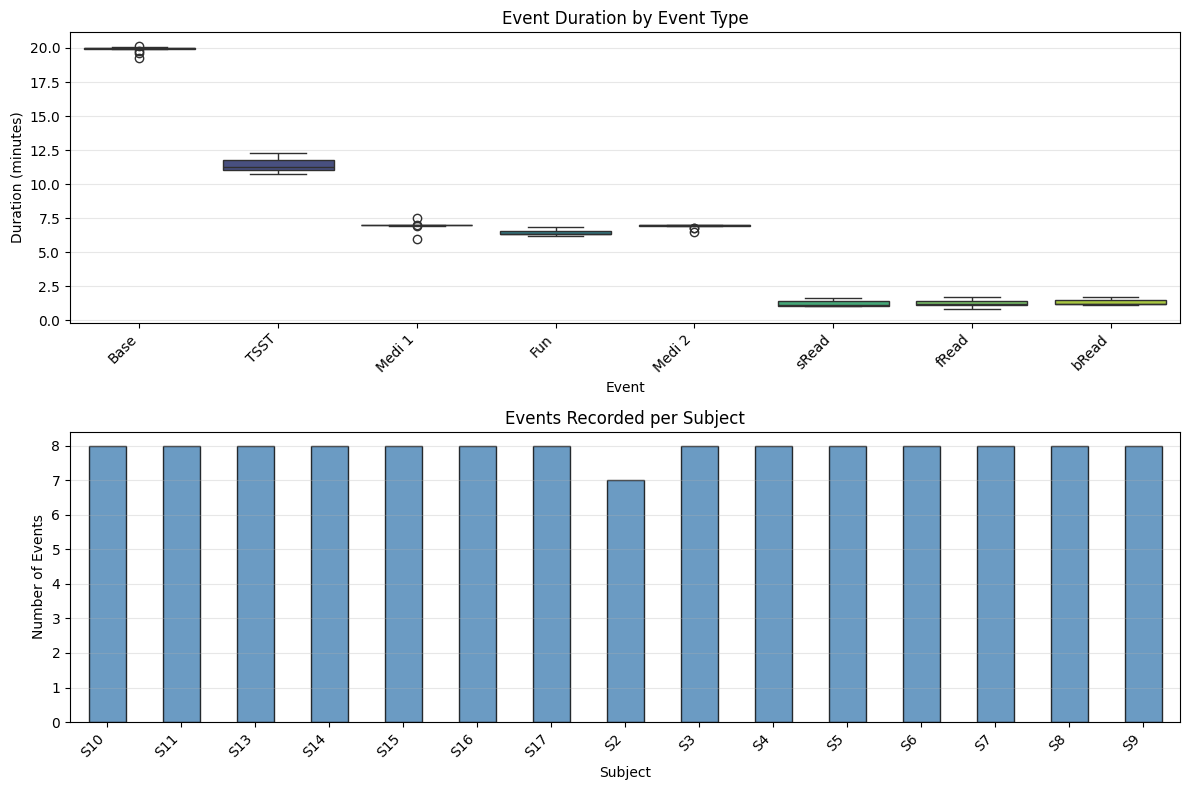

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'
df_events = pd.read_csv(os.path.join(merged_dir, 'merged_event_timings.csv'))
df_quest = pd.read_csv(os.path.join(merged_dir, 'merged_questionnaire_responses.csv'))
df_events['Duration'] = df_events['End_Time'] - df_events['Start_Time']

# --- 1. EVENT TIMINGS EDA ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Event duration distribution by event type
ax1 = axes[0]
event_order = ['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead', 'bRead']
df_plot = df_events[df_events['Event'].isin(event_order)]
sns.boxplot(data=df_plot, x='Event', y='Duration', order=event_order, ax=ax1, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel('Duration (minutes)')
ax1.set_title('Event Duration by Event Type')
ax1.grid(axis='y', alpha=0.3)

# Events per subject
ax2 = axes[1]
events_per_subject = df_events.groupby('subject')['Event'].count()
events_per_subject.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black', alpha=0.8)
ax2.set_xlabel('Subject')
ax2.set_ylabel('Number of Events')
ax2.set_title('Events Recorded per Subject')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/j_/2nhf1vq11vx6vp8923wmdmx40000gn/T/ipykernel_9552/4066754588.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([quest_numeric[c].dropna() for c in dim_cols], labels=dim_cols)


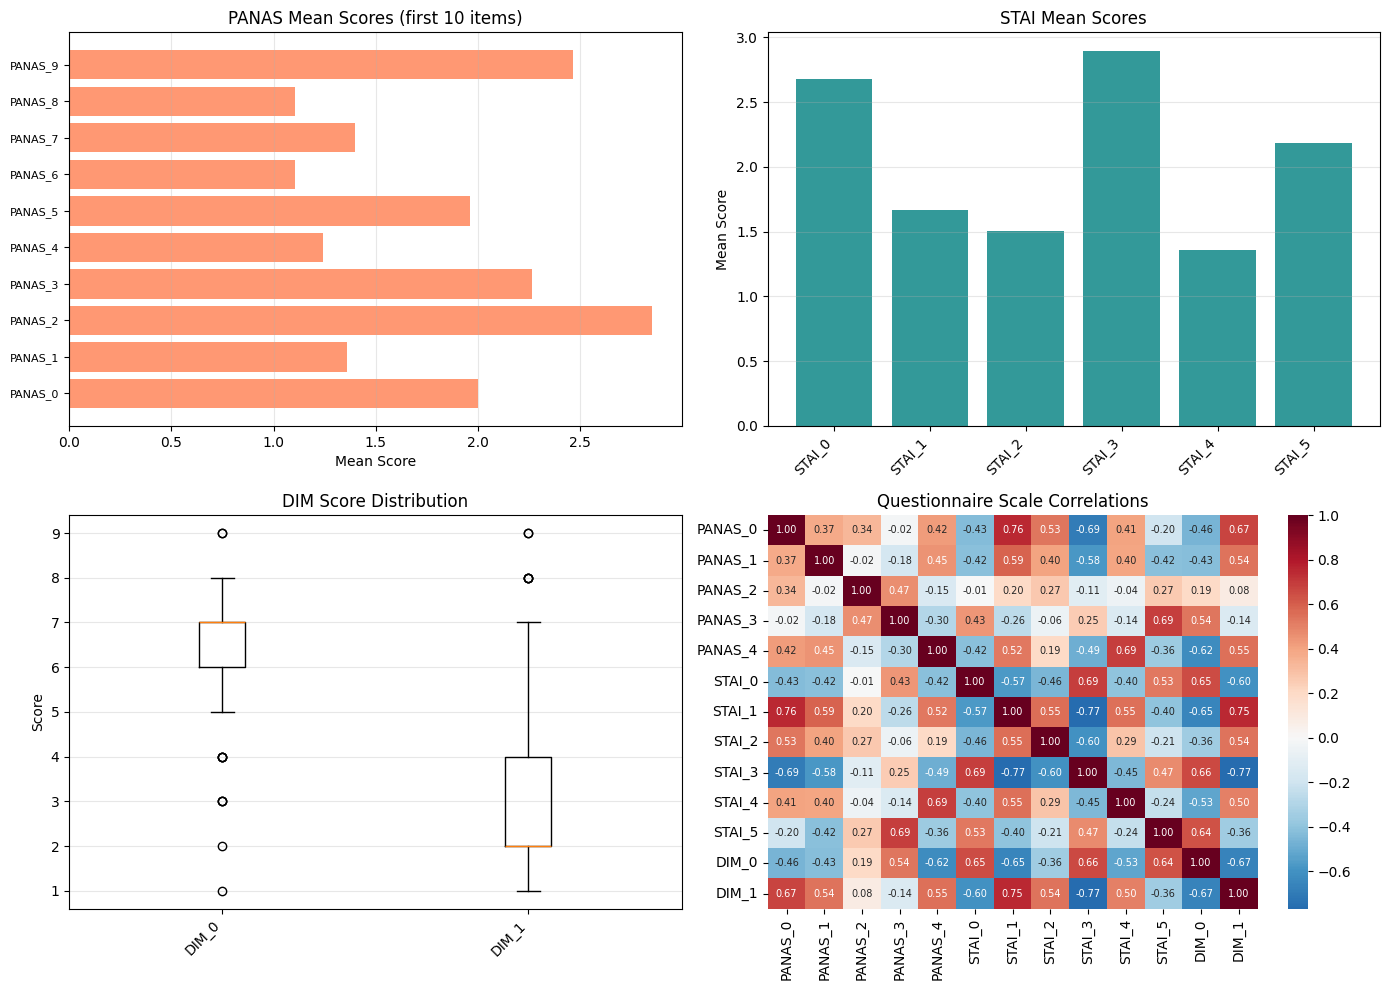

In [30]:
# --- 2. QUESTIONNAIRE EDA ---
numeric_cols = df_quest.select_dtypes(include=[np.number]).columns
quest_numeric = df_quest[numeric_cols].drop(columns=[c for c in numeric_cols if 'SSSQ' in c], errors='ignore')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PANAS summary (first 10 items)
panas_cols = [c for c in quest_numeric.columns if c.startswith('PANAS_')][:10]
if panas_cols:
    panas_means = quest_numeric[panas_cols].mean()
    axes[0,0].barh(range(len(panas_means)), panas_means.values, color='coral', alpha=0.8)
    axes[0,0].set_yticks(range(len(panas_means)))
    axes[0,0].set_yticklabels(panas_cols, fontsize=8)
    axes[0,0].set_xlabel('Mean Score')
    axes[0,0].set_title('PANAS Mean Scores (first 10 items)')
    axes[0,0].grid(axis='x', alpha=0.3)

# STAI summary
stai_cols = [c for c in quest_numeric.columns if c.startswith('STAI_')]
if stai_cols:
    stai_means = quest_numeric[stai_cols].mean()
    axes[0,1].bar(range(len(stai_means)), stai_means.values, color='teal', alpha=0.8)
    axes[0,1].set_xticks(range(len(stai_means)))
    axes[0,1].set_xticklabels(stai_cols, rotation=45, ha='right')
    axes[0,1].set_ylabel('Mean Score')
    axes[0,1].set_title('STAI Mean Scores')
    axes[0,1].grid(axis='y', alpha=0.3)

# DIM summary
dim_cols = [c for c in quest_numeric.columns if c.startswith('DIM_')]
if dim_cols:
    axes[1,0].boxplot([quest_numeric[c].dropna() for c in dim_cols], labels=dim_cols)
    axes[1,0].set_xticklabels(dim_cols, rotation=45, ha='right')
    axes[1,0].set_ylabel('Score')
    axes[1,0].set_title('DIM Score Distribution')
    axes[1,0].grid(axis='y', alpha=0.3)

# Correlation heatmap (sample of questionnaire scales)
scale_cols = panas_cols[:5] + stai_cols + dim_cols if panas_cols else stai_cols + dim_cols
corr_cols = [c for c in scale_cols if c in quest_numeric.columns]
if len(corr_cols) >= 2:
    corr = quest_numeric[corr_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=axes[1,1], 
                xticklabels=True, yticklabels=True, annot_kws={'size': 7})
    axes[1,1].set_title('Questionnaire Scale Correlations')

plt.tight_layout()
plt.show()

In [31]:
# --- 3. SENSOR DATA EDA (with sampling for large files) ---
sensor_files = [f for f in os.listdir(merged_dir) if f.startswith('merged_') 
                and f not in ['merged_event_timings.csv', 'merged_questionnaire_responses.csv']]

# Load sensors with sampling for files > 50 MB
sensor_dfs = {}
for f in sensor_files:
    path = os.path.join(merged_dir, f)
    size_mb = os.path.getsize(path) / (1024 * 1024)
    nrows = 50000 if size_mb > 50 else None  # Sample for large files
    sensor_dfs[f] = pd.read_csv(path, nrows=nrows)

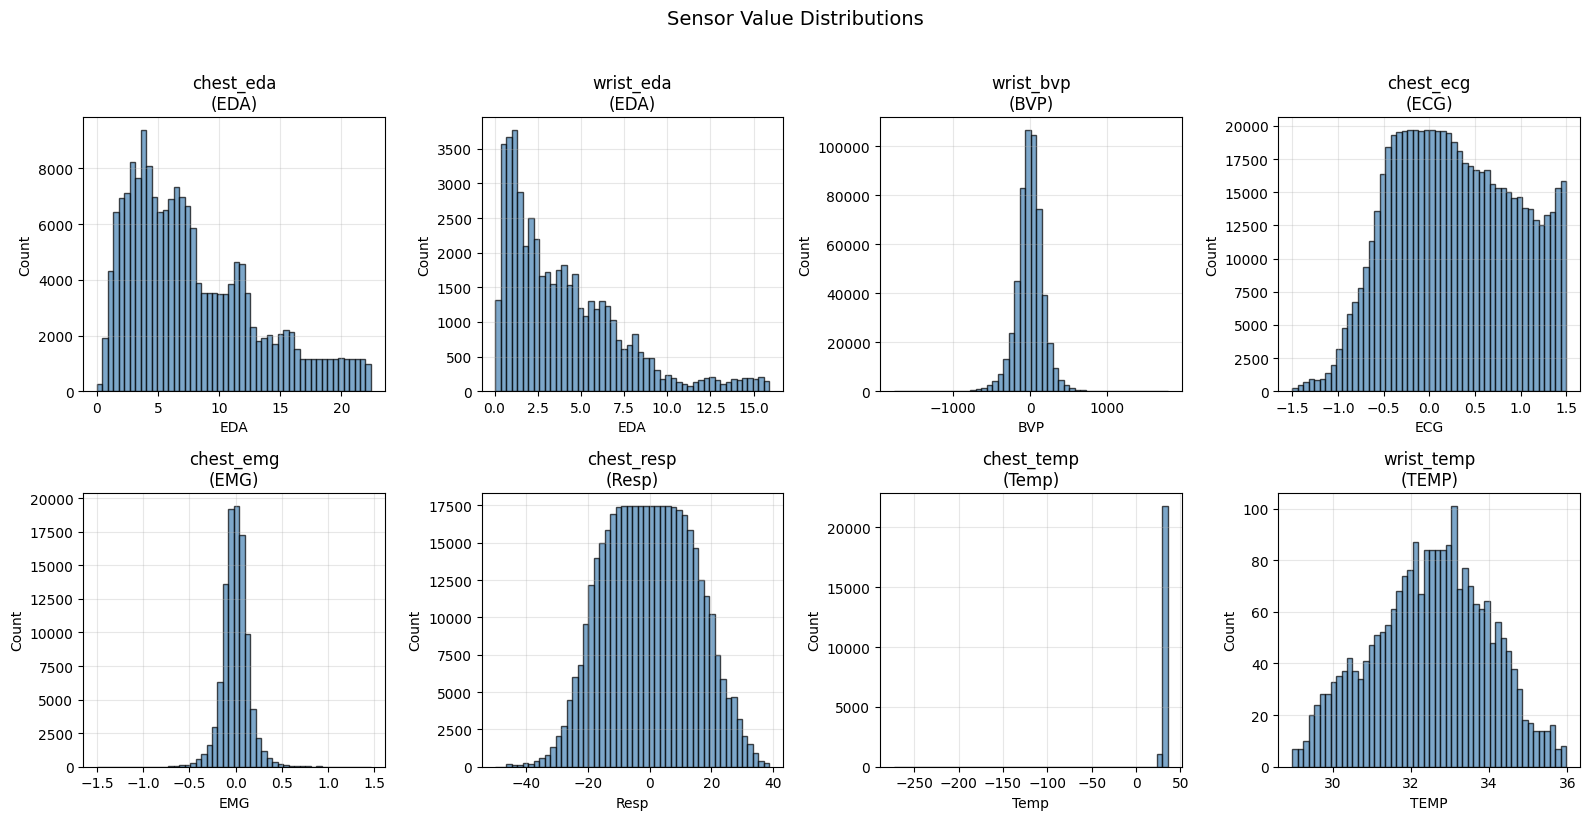

In [32]:
# Sensor distributions - univariate signals (EDA, BVP, ECG, EMG, Resp, Temp)
univariate_sensors = ['merged_chest_eda.csv', 'merged_wrist_eda.csv', 'merged_wrist_bvp.csv', 
                      'merged_chest_ecg.csv', 'merged_chest_emg.csv', 'merged_chest_resp.csv',
                      'merged_chest_temp.csv', 'merged_wrist_temp.csv']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, fname in enumerate(univariate_sensors[:8]):
    if fname not in sensor_dfs:
        continue
    df = sensor_dfs[fname]
    sensor_col = [c for c in df.columns if c != 'subject'][0]
    ax = axes[i]
    df[sensor_col].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{fname.replace("merged_", "").replace(".csv", "")}\n({sensor_col})')
    ax.set_xlabel(sensor_col)
    ax.set_ylabel('Count')
    ax.grid(alpha=0.3)

plt.suptitle('Sensor Value Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

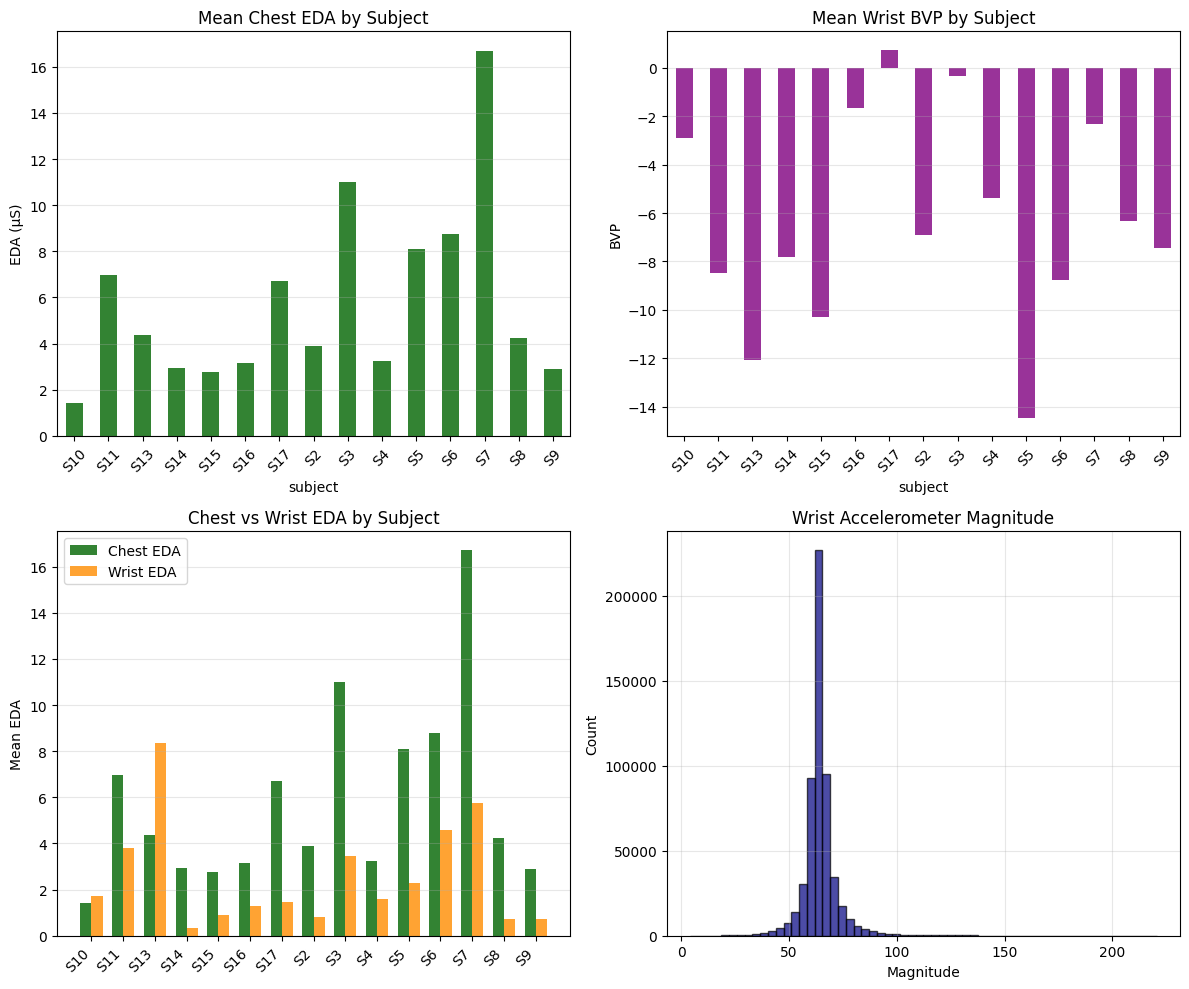

In [33]:
# Subject-level sensor summaries (mean values per subject)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Chest EDA by subject
df_eda = sensor_dfs.get('merged_chest_eda.csv')
if df_eda is not None and 'subject' in df_eda.columns:
    eda_by_subj = df_eda.groupby('subject')['EDA'].agg(['mean', 'std'])
    eda_by_subj['mean'].plot(kind='bar', ax=axes[0,0], color='darkgreen', alpha=0.8)
    axes[0,0].set_title('Mean Chest EDA by Subject')
    axes[0,0].set_ylabel('EDA (µS)')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(axis='y', alpha=0.3)

# Wrist BVP by subject
df_bvp = sensor_dfs.get('merged_wrist_bvp.csv')
if df_bvp is not None and 'subject' in df_bvp.columns:
    bvp_by_subj = df_bvp.groupby('subject')['BVP'].mean()
    bvp_by_subj.plot(kind='bar', ax=axes[0,1], color='purple', alpha=0.8)
    axes[0,1].set_title('Mean Wrist BVP by Subject')
    axes[0,1].set_ylabel('BVP')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(axis='y', alpha=0.3)

# Chest vs Wrist EDA comparison
df_wrist_eda = sensor_dfs.get('merged_wrist_eda.csv')
if df_eda is not None and df_wrist_eda is not None:
    chest_eda = df_eda.groupby('subject')['EDA'].mean()
    wrist_eda = df_wrist_eda.groupby('subject')['EDA'].mean()
    subjs = chest_eda.index.intersection(wrist_eda.index)
    x = np.arange(len(subjs))
    w = 0.35
    axes[1,0].bar(x - w/2, chest_eda.reindex(subjs).values, w, label='Chest EDA', color='darkgreen', alpha=0.8)
    axes[1,0].bar(x + w/2, wrist_eda.reindex(subjs).values, w, label='Wrist EDA', color='darkorange', alpha=0.8)
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(subjs, rotation=45, ha='right')
    axes[1,0].set_ylabel('Mean EDA')
    axes[1,0].set_title('Chest vs Wrist EDA by Subject')
    axes[1,0].legend()
    axes[1,0].grid(axis='y', alpha=0.3)

# Accelerometer (wrist) - magnitude distribution
df_wrist_acc = sensor_dfs.get('merged_wrist_acc.csv')
if df_wrist_acc is not None:
    acc_cols = ['ACC_x', 'ACC_y', 'ACC_z']
    if all(c in df_wrist_acc.columns for c in acc_cols):
        df_wrist_acc = df_wrist_acc.copy()
        df_wrist_acc['ACC_mag'] = np.sqrt(df_wrist_acc['ACC_x']**2 + df_wrist_acc['ACC_y']**2 + df_wrist_acc['ACC_z']**2)
        df_wrist_acc['ACC_mag'].hist(bins=60, ax=axes[1,1], color='navy', alpha=0.7, edgecolor='black')
        axes[1,1].set_title('Wrist Accelerometer Magnitude')
        axes[1,1].set_xlabel('Magnitude')
        axes[1,1].set_ylabel('Count')
        axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
# --- 4. DATA QUALITY & MISSING VALUES ---
print("=" * 60)
print("MISSING VALUES & DATA QUALITY SUMMARY")
print("=" * 60)

# Event timings
print("\n1. Event Timings:")
print(f"   Missing Start_Time: {df_events['Start_Time'].isna().sum()}")
print(f"   Missing End_Time: {df_events['End_Time'].isna().sum()}")

# Questionnaire
print("\n2. Questionnaire Responses:")
print(df_quest.isnull().sum().to_string())

# Sensor data (sample)
print("\n3. Sensor Data - Missing Values (per sensor):")
for fname, df in sensor_dfs.items():
    missing = df.isnull().sum()
    if missing.any():
        print(f"   {fname}: {missing.to_dict()}")

MISSING VALUES & DATA QUALITY SUMMARY

1. Event Timings:
   Missing Start_Time: 0
   Missing End_Time: 0

2. Questionnaire Responses:
PANAS_0      0
PANAS_1      0
PANAS_2      0
PANAS_3      0
PANAS_4      0
PANAS_5      0
PANAS_6      0
PANAS_7      0
PANAS_8      0
PANAS_9      0
PANAS_10     0
PANAS_11     0
PANAS_12     0
PANAS_13     0
PANAS_14     0
PANAS_15     1
PANAS_16     0
PANAS_17     0
PANAS_18     0
PANAS_19     0
PANAS_20     0
PANAS_21     0
PANAS_22     0
PANAS_23     0
PANAS_24    60
PANAS_25    60
STAI_0       0
STAI_1       0
STAI_2       0
STAI_3       0
STAI_4       0
STAI_5       0
DIM_0        0
DIM_1        0
SSSQ_0      60
SSSQ_1      60
SSSQ_2      60
SSSQ_3      60
SSSQ_4      60
SSSQ_5      60
subject      0

3. Sensor Data - Missing Values (per sensor):


In [35]:
# --- 5. EDA KEY FINDINGS ---
print("=" * 60)
print("EDA KEY FINDINGS")
print("=" * 60)
print("""
1. EVENT TIMINGS
   - 15 subjects, 8 event types (Base, TSST, Medi 1, Medi 2, Fun, sRead, fRead, bRead)
   - Base: ~20 min, TSST: ~11 min, Medi/Fun: ~6-7 min, Read tasks: ~1.2 min
   - All subjects have consistent event structure

2. QUESTIONNAIRE
   - 75 rows (5 responses per subject for PANAS/STAI/DIM across conditions)
   - SSSQ has only 15 non-null rows (1 per subject)
   - Scales show expected ranges (1-5 for PANAS/STAI, 1-9 for DIM)

3. SENSOR DATA
   - Chest ACC: very large (~55M rows) - use sampling for analysis
   - Chest vs Wrist EDA: different scales (chest typically higher)
   - Chest Temp: possible outliers (min -273.15 suggests sensor errors)
   - Wrist ACC: integer values, typical range -128 to 127

4. DATA QUALITY
   - Check chest Temp for sensor malfunction (min -273.15°C)
   - SSSQ mostly missing except one response per subject
""")

EDA KEY FINDINGS

1. EVENT TIMINGS
   - 15 subjects, 8 event types (Base, TSST, Medi 1, Medi 2, Fun, sRead, fRead, bRead)
   - Base: ~20 min, TSST: ~11 min, Medi/Fun: ~6-7 min, Read tasks: ~1.2 min
   - All subjects have consistent event structure

2. QUESTIONNAIRE
   - 75 rows (5 responses per subject for PANAS/STAI/DIM across conditions)
   - SSSQ has only 15 non-null rows (1 per subject)
   - Scales show expected ranges (1-5 for PANAS/STAI, 1-9 for DIM)

3. SENSOR DATA
   - Chest ACC: very large (~55M rows) - use sampling for analysis
   - Chest vs Wrist EDA: different scales (chest typically higher)
   - Chest Temp: possible outliers (min -273.15 suggests sensor errors)
   - Wrist ACC: integer values, typical range -128 to 127

4. DATA QUALITY
   - Check chest Temp for sensor malfunction (min -273.15°C)
   - SSSQ mostly missing except one response per subject



## Extract Information from Merged CSVs

Extract structured metadata and summary statistics from each merged CSV file for downstream analysis and reporting.

In [37]:
import os
import pandas as pd
import numpy as np

merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'
csv_files = sorted([f for f in os.listdir(merged_dir) if f.endswith('.csv')])
LARGE_FILE_THRESHOLD = 1_000_000  # Use sampling for files > 1M rows

extraction_results = {}

for fname in csv_files:
    fpath = os.path.join(merged_dir, fname)
    info = {'file': fname, 'path': fpath}
    
    # Load data (full or sampled for large files)
    if os.path.getsize(fpath) > 100_000_000:  # >100MB: use sample
        df = pd.read_csv(fpath, nrows=100_000)
        n_rows = len(df)  # Approximate; full count would require iterating
        info['n_rows'] = f">100k (file ~{os.path.getsize(fpath)/1e6:.0f} MB)"
        info['sampled'] = True
    else:
        df = pd.read_csv(fpath)
        n_rows = len(df)
        info['n_rows'] = n_rows
        info['sampled'] = n_rows > LARGE_FILE_THRESHOLD
    
    info['columns'] = list(df.columns)
    info['dtypes'] = {c: str(d) for c, d in df.dtypes.items()}
    
    # Numeric columns for statistics
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in df.columns if c not in num_cols]
    
    if num_cols:
        stats = df[num_cols].describe().to_dict()
        info['stats'] = {col: {k: float(v) if np.isfinite(v) else None 
                               for k, v in s.items()} for col, s in stats.items()}
    
    if 'subject' in df.columns:
        info['subjects'] = sorted(df['subject'].unique().tolist())
        info['n_subjects'] = len(info['subjects'])
        # Per-subject row counts
        info['rows_per_subject'] = df.groupby('subject').size().to_dict()
    
    # Event timings: extract event info
    if fname == 'merged_event_timings.csv':
        info['events'] = df['Event'].unique().tolist() if 'Event' in df.columns else []
        info['event_durations'] = (df['End_Time'] - df['Start_Time']).describe().to_dict() if 'End_Time' in df.columns else {}
    
    # Questionnaire: extract scale summaries
    if fname == 'merged_questionnaire_responses.csv':
        panas_cols = [c for c in df.columns if c.startswith('PANAS_')]
        stai_cols = [c for c in df.columns if c.startswith('STAI_')]
        if panas_cols:
            info['panas_summary'] = df[panas_cols].describe().iloc[1:4].to_dict()
        if stai_cols:
            info['stai_summary'] = df[stai_cols].describe().iloc[1:4].to_dict()
    
    # Missing values
    info['missing_counts'] = df.isnull().sum().to_dict()
    info['missing_pct'] = (df.isnull().sum() / len(df) * 100).round(2).to_dict()
    
    extraction_results[fname] = info
    print(f"Extracted: {fname} ({n_rows:,} rows, {len(df.columns)} cols)")

# Summary DataFrame
summary_rows = []
for fname, info in extraction_results.items():
    summary_rows.append({
        'file': fname,
        'n_rows': info['n_rows'],
        'n_cols': len(info['columns']),
        'n_subjects': info.get('n_subjects', ''),
        'sampled': info.get('sampled', False),
    })
df_extraction_summary = pd.DataFrame(summary_rows)
print("\n--- EXTRACTION SUMMARY ---")
print(df_extraction_summary.to_string(index=False))

# Per-file extracted info available in extraction_results dict
# Example: extraction_results['merged_event_timings.csv']['events']

Extracted: merged_chest_acc.csv (100,000 rows, 4 cols)
Extracted: merged_chest_ecg.csv (643,020 rows, 2 cols)
Extracted: merged_chest_eda.csv (184,520 rows, 2 cols)
Extracted: merged_chest_emg.csv (101,502 rows, 2 cols)
Extracted: merged_chest_resp.csv (431,009 rows, 2 cols)
Extracted: merged_chest_temp.csv (22,838 rows, 2 cols)
Extracted: merged_event_timings.csv (119 rows, 4 cols)
Extracted: merged_questionnaire_responses.csv (75 rows, 41 cols)
Extracted: merged_wrist_acc.csv (558,962 rows, 4 cols)
Extracted: merged_wrist_bvp.csv (545,681 rows, 2 cols)
Extracted: merged_wrist_eda.csv (49,943 rows, 2 cols)
Extracted: merged_wrist_temp.csv (2,323 rows, 2 cols)

--- EXTRACTION SUMMARY ---
                              file                n_rows  n_cols  n_subjects  sampled
              merged_chest_acc.csv >100k (file ~3542 MB)       4           1     True
              merged_chest_ecg.csv                643020       2          15    False
              merged_chest_eda.csv           

In [38]:
# Display extracted information by category

# 1. Event timings
ev = extraction_results.get('merged_event_timings.csv', {})
if ev:
    print("EVENT TIMINGS:")
    print(f"  Events: {ev.get('events', [])}")
    print(f"  Subjects: {ev.get('n_subjects')}")
    if ev.get('event_durations'):
        dur = ev['event_durations']
        mn, me, mx = dur.get('min', 0), dur.get('mean', 0), dur.get('max', 0)
        print(f"  Duration (min): {float(mn):.2f}s, mean: {float(me):.2f}s, max: {float(mx):.2f}s")

# 2. Questionnaire
quest = extraction_results.get('merged_questionnaire_responses.csv', {})
if quest:
    print("\nQUESTIONNAIRE:")
    print(f"  Subjects: {quest.get('n_subjects')}")
    print(f"  Scale columns: PANAS (26), STAI (6), DIM (2), SSSQ (6)")

# 3. Sensor files - per-subject row counts
print("\nSENSOR DATA - ROWS PER SUBJECT (sample files):")
for fname in ['merged_wrist_eda.csv', 'merged_chest_eda.csv', 'merged_wrist_temp.csv']:
    info = extraction_results.get(fname, {})
    if info and 'rows_per_subject' in info:
        rps = info['rows_per_subject']
        print(f"  {fname}: min={min(rps.values()):,}, max={max(rps.values()):,}")

# 4. Stats sample for one sensor
print("\nSAMPLE STATS (merged_wrist_bvp.csv):")
bvp = extraction_results.get('merged_wrist_bvp.csv', {})
if bvp and 'stats' in bvp and 'BVP' in bvp.get('stats', {}):
    for k, v in bvp['stats']['BVP'].items():
        if v is not None:
            print(f"  BVP {k}: {v:.4f}")

EVENT TIMINGS:
  Events: ['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead', 'bRead']
  Subjects: 15
  Duration (min): 0.80s, mean: 6.97s, max: 20.18s

QUESTIONNAIRE:
  Subjects: 15
  Scale columns: PANAS (26), STAI (6), DIM (2), SSSQ (6)

SENSOR DATA - ROWS PER SUBJECT (sample files):
  merged_wrist_eda.csv: min=162, max=9,250
  merged_chest_eda.csv: min=1,410, max=29,365
  merged_wrist_temp.csv: min=79, max=297

SAMPLE STATS (merged_wrist_bvp.csv):
  BVP count: 545681.0000
  BVP mean: -7.1934
  BVP std: 173.8063
  BVP min: -1773.7600
  BVP 25%: -98.1200
  BVP 50%: -2.9800
  BVP 75%: 91.1600
  BVP max: 1789.0000


In [6]:
import pandas as pd
import numpy as np

In [4]:
print('Listing contents of MyDrive:')
! ls "/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data"

Listing contents of MyDrive:
merged_chest_acc.csv               merged_event_timings.csv
merged_chest_ecg.csv               merged_questionnaire_responses.csv
merged_chest_eda.csv               merged_wrist_acc.csv
merged_chest_emg.csv               merged_wrist_bvp.csv
merged_chest_resp.csv              merged_wrist_eda.csv
merged_chest_temp.csv              merged_wrist_temp.csv


In [7]:
merged_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data'
bvp_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data/merged_wrist_bvp.csv'
eda_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data/merged_wrist_eda.csv'
event_timing_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data/merged_event_timings.csv'

df_bvp = pd.read_csv(bvp_dir)
df_eda = pd.read_csv(eda_dir)
df_event_timing = pd.read_csv(event_timing_dir)


In [10]:
df_bvp.columns

Index(['BVP', 'subject'], dtype='object')

In [28]:
df_bvp.head()


,BVP,subject
0,-59.37,S2
1,-53.42,S2
2,-44.40,S2
3,-33.17,S2
4,-20.79,S2


In [29]:
df_bvp.tail()

,BVP,subject
545676,-151.22,S17
545677,-145.36,S17
545678,-138.09,S17
545679,-123.80,S17
545680,-112.88,S17


In [30]:
df_eda.columns

Index(['EDA', 'subject'], dtype='object')

In [31]:
df_event_timing.columns

Index(['Event', 'Start_Time', 'End_Time', 'subject'], dtype='object')

In [32]:
df_eda.head()

,EDA,subject
0,1.138257,S2
1,1.125444,S2
2,1.011405,S2
3,1.033188,S2
4,0.935807,S2


In [34]:
import pandas as pd
import numpy as np
import sys

# ==========================================
# 1. CONFIGURATION (CHECK THESE!)
# ==========================================
FILE_BVP = bvp_dir
FILE_EDA = eda_dir
OUTPUT_FILE = 'aligned_wrist_data_64Hz.csv'

# Sampling Rates (Fixed by Empatica E4 hardware)
FS_BVP = 64.0  # Hz
FS_EDA = 4.0   # Hz

# ==========================================
# 2. LOAD DATA & DETECT COLUMNS
# ==========================================
print("--- Loading Data Previews ---")
# Load just the first row to check headers
bvp_preview = pd.read_csv(FILE_BVP, nrows=1)
eda_preview = pd.read_csv(FILE_EDA, nrows=1)

print(f"BVP Columns found: {list(bvp_preview.columns)}")
print(f"EDA Columns found: {list(eda_preview.columns)}")

# *** UPDATE THESE STRINGS BASED ON THE PRINT OUTPUT ABOVE ***
# Example: If your column is named 'subject_id', change 'id' to 'subject_id'
COL_SUBJECT = 'subject'   # The column identifying the person (e.g. S2, S3...)
COL_BVP_VAL = 'BVP'       # The column with Blood Volume Pulse values
COL_EDA_VAL = 'EDA'       # The column with Skin Conductance values

# Verify columns exist before proceeding
if COL_SUBJECT not in bvp_preview.columns:
    print(f"\n[ERROR] Column '{COL_SUBJECT}' not found in BVP file.")
    print(f"Please look at the 'BVP Columns found' above and update COL_SUBJECT in the script.")
    sys.exit()

# ==========================================
# 3. ALIGNMENT FUNCTION
# ==========================================
def align_subject(subject_id, df_bvp_sub, df_eda_sub):
    """
    Aligns low-freq EDA (4Hz) to high-freq BVP (64Hz) for a single subject.
    """
    # 1. Generate Relative Time Indices (Seconds since start)
    # -----------------------------------------------------
    # BVP Time: 0, 0.015625, 0.03125...
    n_bvp = len(df_bvp_sub)
    time_bvp = np.arange(n_bvp) / FS_BVP
    
    # EDA Time: 0, 0.25, 0.50...
    n_eda = len(df_eda_sub)
    time_eda = np.arange(n_eda) / FS_EDA

    # 2. Create Series with Time as Index
    # -----------------------------------------------------
    bvp_series = pd.Series(df_bvp_sub[COL_BVP_VAL].values, index=time_bvp)
    eda_series = pd.Series(df_eda_sub[COL_EDA_VAL].values, index=time_eda)

    # 3. Upsample EDA to match BVP Time
    # -----------------------------------------------------
    # Reindex creates NaNs at the new 64Hz timestamps
    # Interpolate fills them linearly
    # ffill/bfill handles the very first/last fractional seconds
    eda_aligned = eda_series.reindex(bvp_series.index).interpolate(method='linear').ffill().bfill()

    # 4. Combine into a clean DataFrame
    # -----------------------------------------------------
    df_aligned = pd.DataFrame({
        COL_SUBJECT: subject_id,
        'time_sec': bvp_series.index,  # Relative time (0.00 to end)
        'bvp': bvp_series.values,
        'eda': eda_aligned.values
    })
    
    return df_aligned

# ==========================================
# 4. MAIN PROCESSING LOOP
# ==========================================
print("\n--- Loading Full Datasets ---")
df_bvp_all = pd.read_csv(FILE_BVP)
df_eda_all = pd.read_csv(FILE_EDA)

print(f"BVP Total Rows: {len(df_bvp_all)}")
print(f"EDA Total Rows: {len(df_eda_all)}")

aligned_dfs = []
unique_subjects = df_bvp_all[COL_SUBJECT].unique()
print(f"\nProcessing {len(unique_subjects)} subjects: {unique_subjects}")

for sub_id in unique_subjects:
    # Extract this subject's data
    sub_bvp = df_bvp_all[df_bvp_all[COL_SUBJECT] == sub_id]
    sub_eda = df_eda_all[df_eda_all[COL_SUBJECT] == sub_id]

    # Safety check: Does this subject exist in both files?
    if sub_eda.empty:
        print(f"  [WARN] Subject {sub_id} found in BVP but MISSING in EDA. Skipping.")
        continue

    # Run Alignment
    try:
        aligned_chunk = align_subject(sub_id, sub_bvp, sub_eda)
        aligned_dfs.append(aligned_chunk)
    except Exception as e:
        print(f"  [ERROR] Failed to align Subject {sub_id}: {e}")

# ==========================================
# 5. SAVE RESULTS
# ==========================================
if aligned_dfs:
    print("\n--- Merging & Saving ---")
    final_df = pd.concat(aligned_dfs, ignore_index=True)
    
    final_df.to_csv(OUTPUT_FILE, index=False)
    print(f"Success! Aligned data saved to: {OUTPUT_FILE}")
    print(f"Final Shape: {final_df.shape}")
    print(final_df.head())
else:
    print("\n[ERROR] No data was aligned. Check your inputs.")

--- Loading Data Previews ---
BVP Columns found: ['BVP', 'subject']
EDA Columns found: ['EDA', 'subject']

--- Loading Full Datasets ---
BVP Total Rows: 545681
EDA Total Rows: 49943

Processing 15 subjects: ['S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S13' 'S14' 'S15'
 'S16' 'S17']

--- Merging & Saving ---
Success! Aligned data saved to: aligned_wrist_data_64Hz.csv
Final Shape: (545681, 4)
  subject  time_sec    bvp       eda
0      S2  0.000000 -59.37  1.138257
1      S2  0.015625 -53.42  1.137456
2      S2  0.031250 -44.40  1.136655
3      S2  0.046875 -33.17  1.135855
4      S2  0.062500 -20.79  1.135054


In [53]:
# Add labels from merged_event_timings to aligned_wrist_data_64Hz.csv
# WESAD label mapping: 0=baseline, 1=stress, 2=amusement; -1=other/transition

import pandas as pd
import numpy as np
import os

ALIGNED_FILE = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/edaFolder/aligned_wrist_data_64Hz.csv'
EVENT_TIMINGS_FILE = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/WESAD_data/merged_cleaned_data/merged_event_timings.csv'

# WESAD standard labels: Base=0, TSST=1, Fun=2; Medi/Read events = -1 (other)
EVENT_TO_LABEL = {'Base': 0, 'TSST': 1, 'Fun': 2}

df = pd.read_csv(ALIGNED_FILE)
df_events = pd.read_csv(EVENT_TIMINGS_FILE)
df_events['label'] = df_events['Event'].map(lambda e: EVENT_TO_LABEL.get(e, -1))

# Vectorized: assign label per (subject, time_sec) using event intervals
labels = np.full(len(df), -1, dtype=np.int64)
for subj in df['subject'].unique():
    mask = (df['subject'] == subj).values
    idx = np.where(mask)[0]
    times = df.loc[mask, 'time_sec'].values
    subj_events = df_events[df_events['subject'] == subj]
    for _, ev in subj_events.iterrows():
        in_range = (times >= ev['Start_Time']) & (times <= ev['End_Time'])
        labels[idx] = np.where(in_range, ev['label'], labels[idx])

df['label'] = labels

# Save labeled dataset
df.to_csv(ALIGNED_FILE, index=False)
print(f'Done! Labels added. Saved to {ALIGNED_FILE}')
print(f'Label distribution:\n{df["label"].value_counts().sort_index()}')
print(f'\nSample (first 10 rows):')
print(df.head(10))

Done! Labels added. Saved to /Users/mostafazamaniturk/Documents/USD/AAI-530/work/edaFolder/aligned_wrist_data_64Hz.csv
Label distribution:
label
-1    509467
 0     19120
 1     10925
 2      6169
Name: count, dtype: int64

Sample (first 10 rows):
  subject  time_sec    bvp       eda  label
0      S2  0.000000 -59.37  1.138257     -1
1      S2  0.015625 -53.42  1.137456     -1
2      S2  0.031250 -44.40  1.136655     -1
3      S2  0.046875 -33.17  1.135855     -1
4      S2  0.062500 -20.79  1.135054     -1
5      S2  0.078125  -8.33  1.134253     -1
6      S2  0.093750   3.40  1.133452     -1
7      S2  0.109375  13.85  1.132651     -1
8      S2  0.125000  22.76  1.131851     -1
9      S2  0.140625  30.04  1.131050     -1


In [54]:
print('Listing contents of MyDrive:')
! ls "/Users/mostafazamaniturk/Documents/USD/AAI-530/work/edaFolder"

Listing contents of MyDrive:
1d-cnn-model.ipynb              aligned_wrist_data_64Hz.csv.zip
ai_data_cleaning-wesad.ipynb    eda_aligned_wrist_64Hz.ipynb
aligned_wrist_data_64Hz.csv


In [55]:
aligned_dir = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/edaFolder/aligned_wrist_data_64Hz.csv'

df = pd.read_csv(aligned_dir)


In [56]:
df.columns

Index(['subject', 'time_sec', 'bvp', 'eda', 'label'], dtype='object')

In [57]:
df.head()


,subject,time_sec,bvp,eda,label
0,S2,0.000000,-59.37,1.138257,-1
1,S2,0.015625,-53.42,1.137456,-1
2,S2,0.031250,-44.40,1.136655,-1
3,S2,0.046875,-33.17,1.135855,-1
4,S2,0.062500,-20.79,1.135054,-1


In [58]:
df.tail()


,subject,time_sec,bvp,eda,label
545676,S17,512.531250,-151.22,0.783331,-1
545677,S17,512.546875,-145.36,0.783331,-1
545678,S17,512.562500,-138.09,0.783331,-1
545679,S17,512.578125,-123.80,0.783331,-1
545680,S17,512.593750,-112.88,0.783331,-1


In [62]:
df.describe()


,time_sec,bvp,eda,label
count,545681.000000,545681.000000,545681.000000,545681.000000
mean,308.649200,-7.193352,2.199798,-0.891004
std,206.567864,173.806327,2.061769,0.452757
min,0.000000,-1773.760000,0.045113,-1.000000
25%,142.093750,-98.120000,0.609179,-1.000000
50%,284.203125,-2.980000,1.424795,-1.000000
75%,438.968750,91.160000,3.293805,-1.000000
max,991.593750,1789.000000,10.215387,2.000000


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545681 entries, 0 to 545680
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   subject   545681 non-null  object 
 1   time_sec  545681 non-null  float64
 2   bvp       545681 non-null  float64
 3   eda       545681 non-null  float64
 4   label     545681 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 20.8+ MB


In [64]:
df.isnull().sum()

subject     0
time_sec    0
bvp         0
eda         0
label       0
dtype: int64

In [65]:
# Verify labeled data (run after the label-assignment cell above)
ALIGNED_FILE = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/edaFolder/aligned_wrist_data_64Hz.csv'
df = pd.read_csv(ALIGNED_FILE)
print('Label distribution (0=baseline, 1=stress, 2=amusement, -1=other):')
print(df['label'].value_counts().sort_index())
print('\nColumns:', list(df.columns))
print('\nSample with labels:')
print(df.head(10))



Label distribution (0=baseline, 1=stress, 2=amusement, -1=other):
label
-1    509467
 0     19120
 1     10925
 2      6169
Name: count, dtype: int64

Columns: ['subject', 'time_sec', 'bvp', 'eda', 'label']

Sample with labels:
  subject  time_sec    bvp       eda  label
0      S2  0.000000 -59.37  1.138257     -1
1      S2  0.015625 -53.42  1.137456     -1
2      S2  0.031250 -44.40  1.136655     -1
3      S2  0.046875 -33.17  1.135855     -1
4      S2  0.062500 -20.79  1.135054     -1
5      S2  0.078125  -8.33  1.134253     -1
6      S2  0.093750   3.40  1.133452     -1
7      S2  0.109375  13.85  1.132651     -1
8      S2  0.125000  22.76  1.131851     -1
9      S2  0.140625  30.04  1.131050     -1
